##### implementing a linear regression model to predict the price of a house , given the features of the house.

In [34]:
# required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# data 
from sklearn.datasets import load_boston

# evaluation
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
# first lets read the dataset. the data is in csv format and can be read by pandas read_csv method
house_dataset = load_boston()

In [7]:
print(house_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
house_data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

In [9]:
house_data['Price'] = house_dataset.target

In [10]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### explore the data to get some idea about the state of the columns and the relationship b/w the columns
##### use pandas provided build-in method to get some information about the data

In [11]:
# the data set consists 506 house samples each with 14 features or characteristics
house_data.shape

(506, 14)

In [12]:
# lets check for the types in the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [13]:
# lets get the basic aggregations of the integer columns in the dataset
house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### do some visual exploration of the data to get some information
#### as 'Price' column is our column of interest we will try to understand the distribution and relationship of it

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

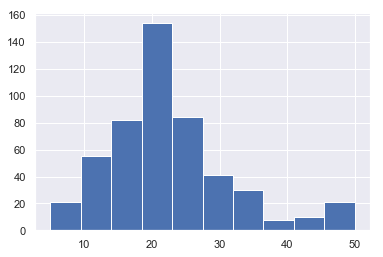

In [14]:
# check the range our price values are distributed
plt.hist(house_data['Price'])

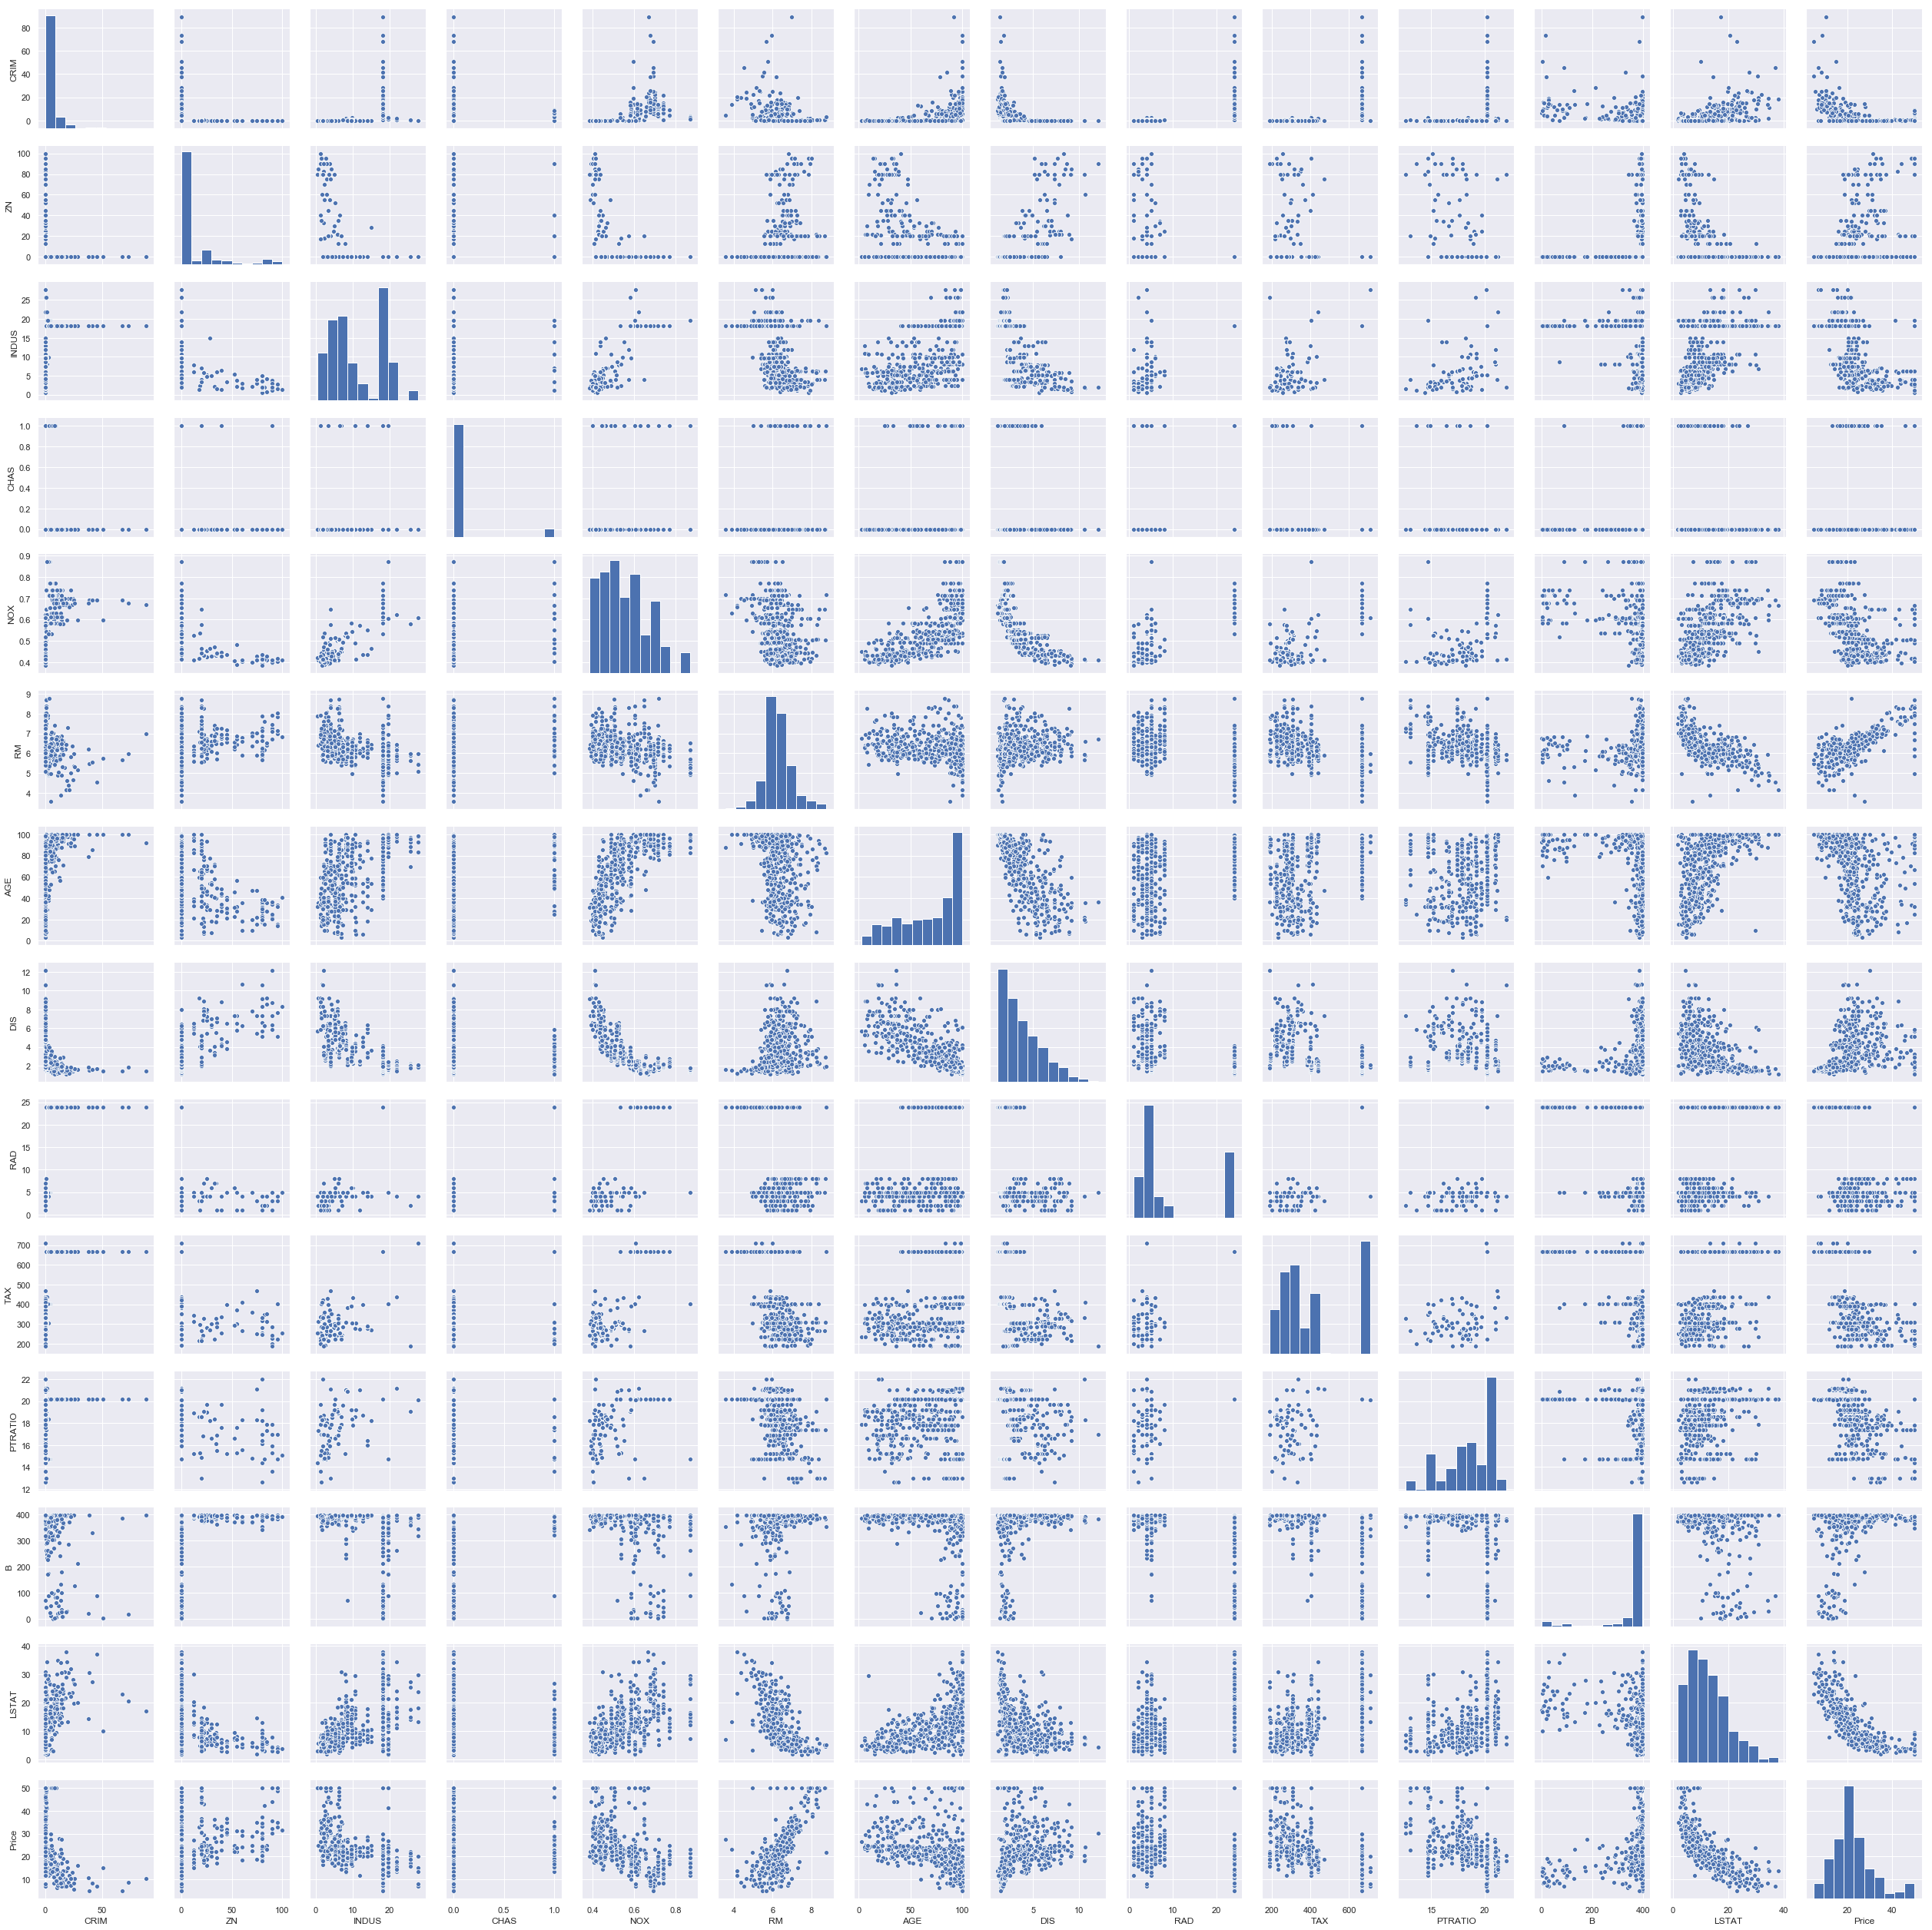

In [15]:
sns.pairplot(house_data, dropna=False)

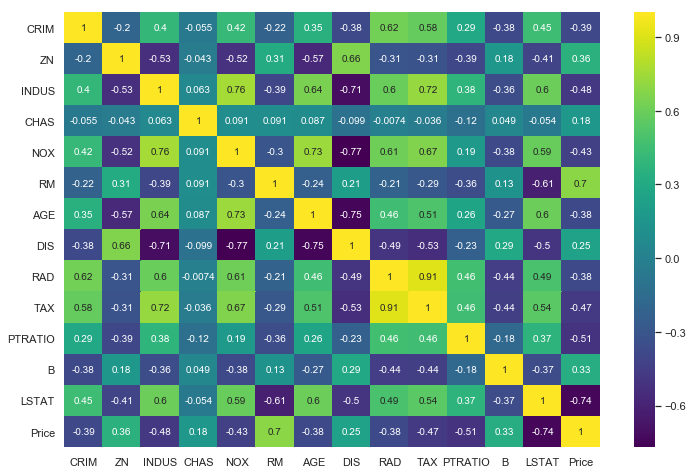

In [16]:
# to better understand the correlation of 'price' column with other columns
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(house_data.corr(), cmap='viridis', annot=True, ax=ax)

In [17]:
house_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [40]:
# processing the data

# feature normalizing the data to bring the values to the same scale
house_data = feature_normalize(house_data)

# X = house_data[['CRIM','RM', 'AGE', 'TAX','PTRATIO', 'LSTAT']]
X = house_data[['CRIM', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']]
y = house_dataset.target
m, n = X.shape

# adding an extra column of ones for the theta0 term
X_ = np.ones((m, n+1))
X_[:, 1:] = X

# splitting the data into train and test sets
# choosing a random order of the data to ignore any bias
idx = np.random.permutation(m)
X_train = X_[idx[:-400]]
X_test = X_[idx[400:]]
y_train = y[idx[:-400]]
y_test = y[idx[400:]]

#X_train[:, 1:] = feature_normalize(X_train[:, 1:])
#y_train = feature_normalize(y_train)


In [19]:
# before using the data to train our model, we have to feature normalize the dataset.
# as the values in different column scale at different range.(eg. value of 'income' in thousands and 'rooms' in ones)
# for this we have to feature normalize the dataset to bring all the values to a similar scale(range)

def feature_normalize(X):
    # computes the mean along each column
    X_mean = np.mean(X, axis=0)
    
    # computes the std along each column
    X_std = np.std(X, axis=0)
    
    return ( X - X_mean) / X_std

#### now lets define the functions to build our model
#### a linear regression model will require two function
####    > cost_function
####    > gradient_descent
#### the cost_function computes the cost(i.e., to which extent was our prediction wrong) for the given theta parameter
#### the gradient_descent function tries to adjust the theta parameter to obtain the minimum cost

In [41]:
# we use the mean squared error method to compute the error in our prediction. the theta prameter is the 
# current value our model has computed.we make our prediction of the price with this theta parameter and compute
# corresponding error.
# formula for cost = 1 / 2m * sum( hypo - y ** 2 )

def compute_cost(X, y, theta):
    hypothesis = np.dot(X, theta)
    squared_error = np.sum( (hypothesis - y) ** 2) / ( len(X) * 2 )
    return squared_error

In [42]:
# gradient descent algorithm is the algorithm that to used to compute the optimal theta 
# the algorithm works by updating the theta value with a derivative term that will increase or decrease the theta
#  such that cost reaches the less value possible
# the alpha parameter is called the learning rate, this determines the rate at which the theta gets updated.
# if alpha is too low, then theta will be updated by some small value and late convergence.
# if alpha is too high , then theta will be updated by large value which would cause the model to fail to converge in optimum cost
# formula to grad = theta - ( alpha / m) * ((hypo -y) * X)

def gradient_descent(X, y, theta, alpha, num_itr):
    
    m = len(X)
    J_history = np.zeros(num_itr)
    for itr in range(num_itr):
        hypothesis = np.dot(X, theta)
        derivative = np.dot((hypothesis - y), X)
        theta = theta - (alpha / m) * derivative
        cost = compute_cost(X, y, theta)
        J_history[itr] = cost
        
    return J_history, theta

In [51]:
# setting the initial parameters
# try with different values of alpha to find the convergence rate
m, n = X_train.shape
theta = np.ones(n)
alpha = 0.3
num_itr = 200

J_history, theta = gradient_descent(X_train, y_train, theta, alpha, num_itr)

In [52]:
# the parameter that our model thinks that best fits our training data
theta

array([22.3094001 , -0.32878137,  2.10931957,  1.54868243,  0.68608367,
       -1.12082437, -7.10294161])

Text(0,0.5,'error')

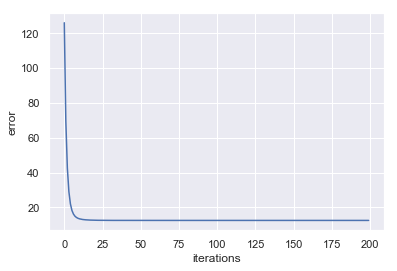

In [53]:
# we can visualize the reduction in the error as the iteration increase
# if our error value increase with number of iteration , then we have missed something
# also try changing the alpha value and see how fast the error curve falls to the minimum value

plt.plot(range(num_itr), J_history)
plt.xlabel('iterations')
plt.ylabel('error')

Text(0,0.5,'predicted price')

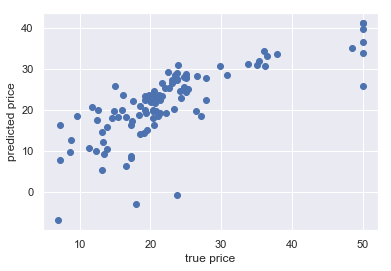

In [54]:
# evaluating the model
# lets use the theta parameter learned by the model to predict the price of our X test set and 
# evaluate the result against our y test set

y_predict = np.dot(X_test, theta)
plt.scatter(y_test, y_predict)
plt.xlabel('true price')
plt.ylabel('predicted price')

In [55]:
# it seems from the above plot that most of our predict and the true value are approximately equal.
# we also have some built in evaluation method that gives us a score for our predictions

In [56]:
mean_squared_error(y_test, y_predict)

41.85437046215589

In [28]:
explained_variance_score(y_test, y_predict)

0.5499642895487391

In [29]:
mean_absolute_error(y_test, y_predict)

4.824121412726624

In [30]:
r2_score(y_test, y_predict)

0.5497249350508786